# Artificial Neural Networks (ANN) Documentation

##### An Artificial Neural Network (ANN) is a computational model inspired by the way biological neural networks in the human brain process information. This notebook will guide you through the creation, functioning, and hyperparameters of an ANN using Python and popular libraries such as TensorFlow and Keras. We will also provide examples to demonstrate how to build, train, and evaluate an ANN.

# Setup

In [1]:
# Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Installation (if not already installed)
# !pip install numpy tensorflow scikit-learn


# Data Loading and Preprocessing

In [2]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display dataset information
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (120, 4)
Test data shape: (30, 4)


# Building the ANN Model
We start with a Sequential model, a linear stack of layers suitable for problems where each layer has one input tensor and one output tensor. The input layer, with 10 neurons and a ReLU activation function, is designed to match the number of features in the dataset. We then add a hidden layer with 8 neurons, also using ReLU to help the model learn complex patterns and mitigate the vanishing gradient problem. The output layer consists of 3 neurons, corresponding to the 3 classes in the Iris dataset, and employs the softmax activation function to output a probability distribution for multi-class classification. The model is compiled with the Adam optimizer for adaptive learning rate optimization and the sparse categorical crossentropy loss function, suitable for integer-labeled multi-class classification tasks.

In [3]:
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


# Hyperparameters
Hyperparameters are the parameters that are not learned during training but are set before the training process. Some important hyperparameters in ANNs include:

- **Learning Rate**: Controls how much to change the model in response to the estimated error each time the model weights are updated.
- **Batch Size**: The number of samples processed before the model is updated.
- **Epochs**: The number of times the entire dataset is passed forward and backward through the neural network.

In this example, we use:
- Optimizer: Adam
- Loss function: Sparse Categorical Crossentropy
- Metrics: Accuracy
- Batch size: 32
- Epochs: 50


# Model Training

Epoch 1/50
3/3 [==============================] - 1s 191ms/step - loss: 0.9100 - accuracy: 0.5729 - val_loss: 1.0165 - val_accuracy: 0.3750
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 0.8953 - accuracy: 0.5729 - val_loss: 1.0030 - val_accuracy: 0.3750
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 0.8802 - accuracy: 0.5938 - val_loss: 0.9898 - val_accuracy: 0.4167
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 0.8656 - accuracy: 0.6042 - val_loss: 0.9777 - val_accuracy: 0.4167
Epoch 5/50
3/3 [==============================] - 0s 26ms/step - loss: 0.8517 - accuracy: 0.6146 - val_loss: 0.9657 - val_accuracy: 0.4167
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 0.8383 - accuracy: 0.6146 - val_loss: 0.9543 - val_accuracy: 0.4167
Epoch 7/50
3/3 [==============================] - 0s 22ms/step - loss: 0.8252 - accuracy: 0.6146 - val_loss: 0.9437 - val_accuracy: 0.4167
Epoch 8/50
3/3 [==========

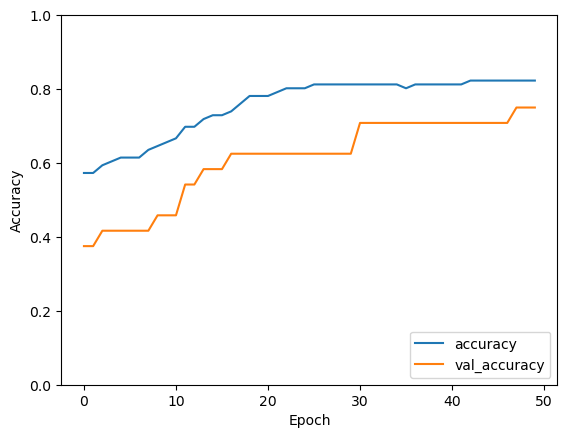

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Visualize training process
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Model Evaluation

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.5685 - accuracy: 0.7333 - 32ms/epoch - 32ms/step

Test accuracy: 0.7333333492279053


In [6]:
# Example predictions
predictions = model.predict(X_test[:5])
print("Predicted probabilities:\n", predictions)
print("Predicted classes:\n", np.argmax(predictions, axis=1))
print("Actual classes:\n", y_test[:5])


1/1 [==============================] - 0s 133ms/step
Predicted probabilities:
 [[0.22770461 0.5052114  0.26708394]
 [0.9563039  0.02685304 0.01684307]
 [0.16171093 0.43458238 0.40370664]
 [0.20779368 0.4743533  0.31785312]
 [0.18138781 0.48181167 0.33680055]]
Predicted classes:
 [1 0 1 1 1]
Actual classes:
 [1 0 2 1 1]


## Conclusion
In this notebook, we have built and trained an Artificial Neural Network using TensorFlow and Keras. We covered the preprocessing of data, building the model, setting hyperparameters, training, and evaluating the model. 

### Further Reading
- [Deep Learning with Python by François Chollet](https://www.manning.com/books/deep-learning-with-python)
- [TensorFlow Documentation](https://www.tensorflow.org/learn)

### Improvements
- Experiment with different architectures and hyperparameters.
- Use cross-validation for more robust model evaluation.
- Apply this approach to other datasets and problem domains.
